# Heart Desease Prediction

Execise: Predict if a patient has a heart disease or not. We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.

Dataset = https://archive.ics.uci.edu/ml/datasets/Heart+Disease

-----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from math import pi

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load and prepare data

In [2]:
import os
os.path.abspath(os.getcwd())

'/Users/jeydi/OneDrive/CorsoInsubria-DataScienceBusiness/Notebooks/6_machine_learning/deep_learning'

In [3]:
data_path='./data/heart.csv'

df = pd.read_csv(data_path)

print(f"Dataframe shape: {df.shape}")
df.head(10)

Dataframe shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Understand the data

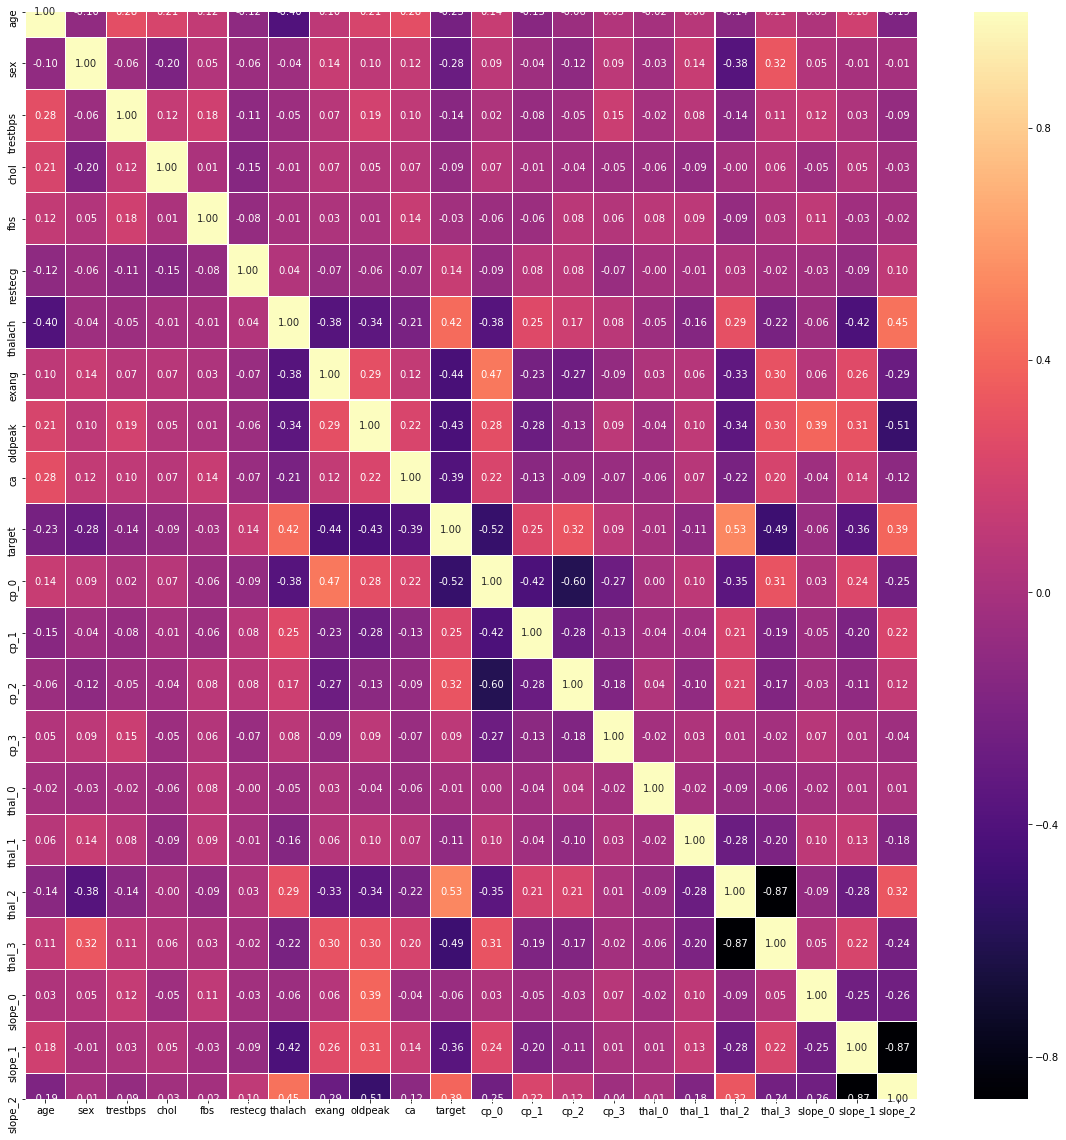

In [77]:
fig,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

People having heart diseace vs people who doesn't: 
 1.0    165
0.0    138
Name: target, dtype: int64


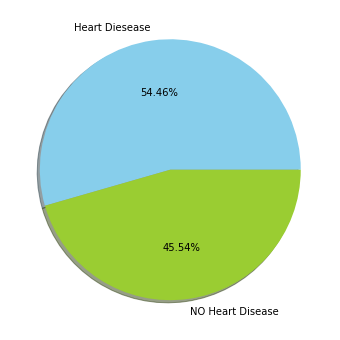

In [79]:
print("People having heart diseace vs people who doesn't: \n", df.target.value_counts())
heart_disease = len(df[df['target']==1])
no_heart_disease = len(df[df['target']==0])
labels = ["Heart Diesease", "NO Heart Disease"]
sizes = [heart_disease, no_heart_disease]
colors = ['skyblue', 'yellowgreen']
plt.figure(figsize=(8,6))

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True)
plt.show()

## Feature Engineering

Dummy variables (cp, thal, slope)

In [4]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)

to_be_dropped = ['cp', 'thal', 'slope']
df = df.drop(to_be_dropped, axis=1)
df.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


Get features and target

In [5]:
df = (df - np.min(df)) / (np.max(df) - np.min(df)).values

Get features and target

In [6]:
features = df.drop("target", axis=1)
targets = df.target.values

Split the dataset

In [7]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_targets,test_targets = train_test_split(features,targets,test_size = 0.20,random_state = 42)

Visualize shape of the dataset and info

In [109]:
print (test_features.shape)
print (test_targets.shape)
print (test_targets[:10])

(61, 21)
(61,)
[0. 0. 1. 0. 1. 1. 1. 0. 0. 1.]


## Build models

### First easy model

In [119]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

Build the model (4 layers)

In [121]:
# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(train_features.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 128)               2816      
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 33        
Total params: 13,185
Trainable params: 13,185
Non-trainable params: 0
_________________________________________________________________


Tensorboard configuration

In [122]:
#Tensorboard configuration
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [130]:
#Launch tensorboard
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


Train the model

In [124]:
#Train the model
n_epochs = 100

history = model.fit(train_features, 
                    train_targets, 
                    validation_split=0.2, 
                    epochs=n_epochs, 
                    batch_size=16, 
                    verbose=0, 
                    callbacks=[tensorboard_callback])

## Evaluate the model and results

evaluate model loss with epochs on train and test

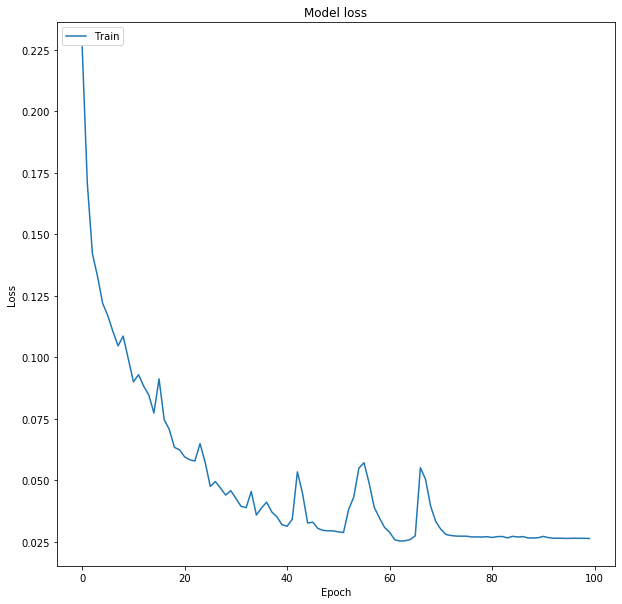

In [125]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Prediction vs original labels

Text(0.5, 1.0, 'Prediction')

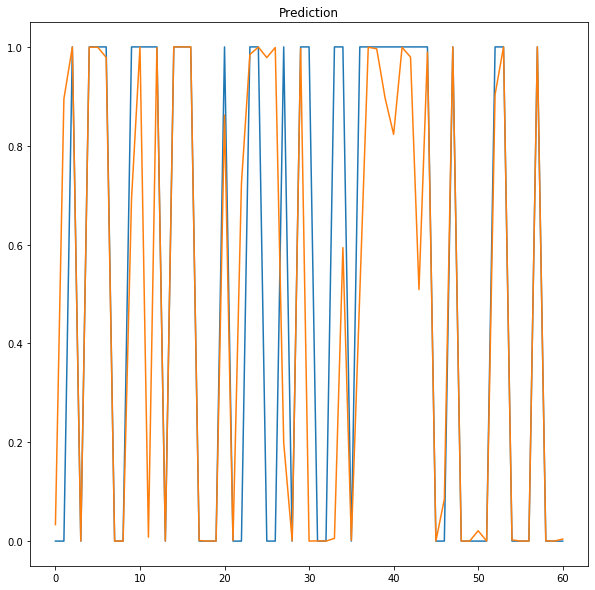

In [129]:
plt.figure(figsize=(10,10))
y_pred = model.predict(test_features)
plt.plot(test_targets)
plt.plot(y_pred)
plt.title('Prediction')

### More complicated model

Recreate the input using 2 dim on output

In [99]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

# convert the data to categorical labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [93]:
print(y_train.shape)
print(x_train.shape)

(60000,)
(60000, 28, 28)


Define the new model and compile

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_shape=(train_features.shape[1],), activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 16)                352       
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 18        
Total params: 506
Trainable params: 506
Non-trainable params: 0
_________________________________________________________________
None


Fit the model

In [112]:
# fit the model to the training data
n_epochs = 200
n_batch = 10
history=model.fit(X_train, Y_train, validation_data=(X_train, Y_train),epochs=n_epochs, batch_size=n_batch, verbose = 0)

Print model accuracy vs val accuracy

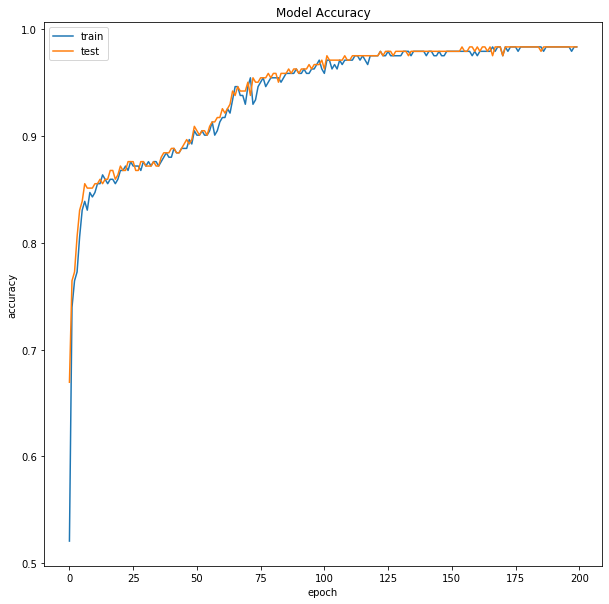

In [117]:
# Model accuracy
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Print model loss vs val loss

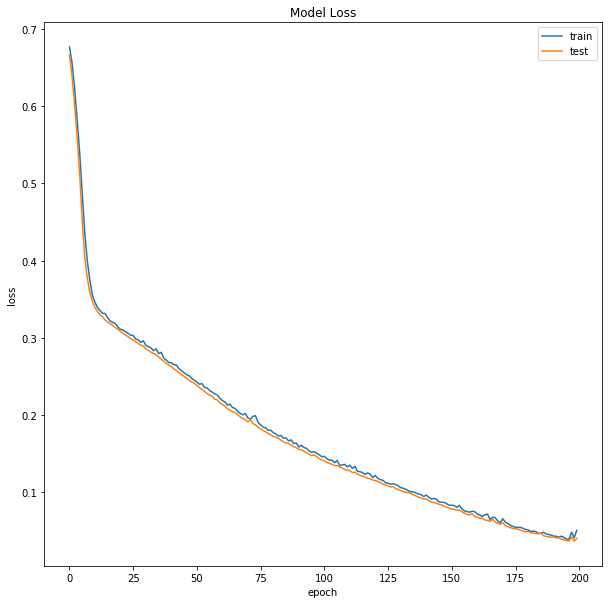

In [118]:
# Model Losss
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# MNIST Example

https://keras.io/api/datasets/mnist/

Import the dataset

In [52]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Create the model

In [56]:
def create_model():
    return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

Create a second more complicated model

In this case we use dropout to avoid overfitting: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

In [53]:
def create_model():
    return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

Tensorboard configuration

In [57]:
#Tensorboard configuration
from datetime import datetime
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)


Train the model (and compile)

In [75]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','CategoricalAccuracy'])

n_epochs = 5
history = model.fit(x=x_train, 
          y=y_train, 
          epochs=n_epochs, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2818 - accuracy: 0.9178 - categorical_accuracy: 0.1002 - val_loss: 0.1734 - val_accuracy: 0.9466 - val_categorical_accuracy: 0.1009
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1250 - accuracy: 0.9613 - categorical_accuracy: 0.0992 - val_loss: 0.1055 - val_accuracy: 0.9652 - val_categorical_accuracy: 0.1001
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0922 - accuracy: 0.9710 - categorical_accuracy: 0.0991 - val_loss: 0.1061 - val_accuracy: 0.9683 - val_categorical_accuracy: 0.0994
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0717 - accuracy: 0.9779 - categorical_accuracy: 0.0990 - val_loss: 0.0915 - val_accuracy: 0.9720 - val_categorical_accuracy: 0.0973
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0586 - accuracy: 0.9816 - categorical_accuracy: 0.0987 - val_loss: 0.0809 - val_accurac

Compare the results (val loss)

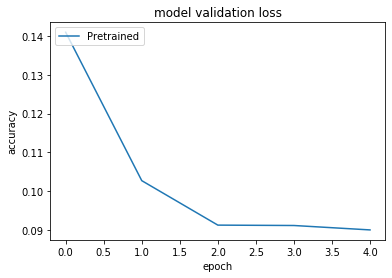

In [67]:
plt.plot(history.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Model'], loc='upper left')
plt.show()